# 第4章: 形態素解析

In [1]:
# ファイルをコピー
!cp /content/drive/MyDrive/iyatomi/nlp100/neko.txt /content/

In [2]:
!pip install mecab-python3==0.996.5

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
# マッピング型=辞書
import MeCab
tagger = MeCab.Tagger("-Ochasen") # chasenとはmecabとは別の形態素解析機の名前．chasenと同じフォーマットで出力するモードを指定
with open('neko.txt') as f:
    text = f.read()
text_parsed = tagger.parse(text)
print(text_parsed)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
# tagger.parse()だと文全体を解析処理した結果を返す
# 単語ごとの情報が欲しいのでtagger.parseToNode()を使用する
# ためしに最初の10文字を形態素解析
print(text[:11])
node = tagger.parseToNode(text[:11])
while node:
    # 表層形の表示
    print('surface', node.surface)
    # 品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音を表示
    print('feature', node.feature)
    ftr_list = node.feature.split(',')
    print('base', ftr_list[6])  # 原型(基本形？) 
    print('pos', ftr_list[0])   # 品詞
    print('pos1', ftr_list[1])  # 品詞細分類1

    node = node.next

一

　吾輩は猫である
surface 
feature BOS/EOS,*,*,*,*,*,*,*,*
base *
pos BOS/EOS
pos1 *
surface 一
feature 名詞,数,*,*,*,*,一,イチ,イチ
base 一
pos 名詞
pos1 数
surface 　
feature 記号,空白,*,*,*,*,　,　,　
base 　
pos 記号
pos1 空白
surface 吾輩
feature 名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
base 吾輩
pos 名詞
pos1 代名詞
surface は
feature 助詞,係助詞,*,*,*,*,は,ハ,ワ
base は
pos 助詞
pos1 係助詞
surface 猫
feature 名詞,一般,*,*,*,*,猫,ネコ,ネコ
base 猫
pos 名詞
pos1 一般
surface で
feature 助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
base だ
pos 助動詞
pos1 *
surface ある
feature 助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
base ある
pos 助動詞
pos1 *
surface 
feature BOS/EOS,*,*,*,*,*,*,*,*
base *
pos BOS/EOS
pos1 *


In [5]:
node = tagger.parseToNode(text)
node_list = []
while node:
    surface = node.surface  # 表層形
    if surface == '':
        node = node.next
        continue
    ftr_list = node.feature.split(',')
    base = ftr_list[6]  # 原型(基本形？) 
    pos = ftr_list[0]   # 品詞
    pos1 = ftr_list[1]  # 品詞細分類1
    # dict_node[(surface, base, pos, pos1)] = node # これは違う
    mor = {'surface':surface, 'base':base, 'pos':pos, 'pos1':pos1}
    node_list.append(mor)
    node = node.next
print(node_list[0])

{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}


## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [6]:
# これだと重複があるのでよくない
verb_list = [node['surface'] for node in node_list if node['pos']=='動詞']
print(verb_list)
# 重複なし
verb_set = {node['surface'] for node in node_list if node['pos']=='動詞'}
print(verb_set)
print(len(verb_set))

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え', '煮', '食う', '思わ', '載せ', 'られ', '持ち上げ', 'られ', 'し', 'あっ', '落ちつい', '見', '見', '思っ', '残っ', 'いる', 'さ', 'れ', 'し', '逢っ', '出会わ', 'し', 'なら', 'し', 'いる', '吹く', 'せ', '弱っ', '飲む', '知っ', '坐っ', 'おっ', 'する', 'し', '始め', '動く', '動く', '分ら', '廻る', 'なる', '助から', '思っ', 'いる', 'さり', 'し', '出', 'し', 'いる', '考え出そ', '分ら', '付い', '見る', 'い', 'おっ', '見え', '隠し', 'しまっ', '違っ', '明い', 'い', 'られ', '這い出し', '見る', '棄て', 'られ', '這い出す', 'ある', '坐っ', 'し', '考え', '見', '出', 'し', '泣い', '来', 'くれる', '考え付い', 'やっ', '見', '来', '渡っ', 'かかる', '減っ', '来', '泣き', '出', 'ある', 'ある', 'し', 'そろ', '廻り', '始め', 'し', '這っ', '行く', '出', '這入っ', 'なる', '思っ', '崩れ', 'もぐり込ん', '破れ', 'い', 'し', '知れ', '云っ', '至る', 'する', 'なっ', 'いる', '忍び込ん', '分ら', 'なる', '減る', '降っ', '来る', '出来', 'なっ', 'あるい', '行く', '考える', '這入っ', 'おっ', '見る', 'し', '逢っ', '見る', 'つかん', '抛り出し', '思っ', 'ねぶっ', '任せ', 'い', '出来', '見', '這い', '上っ', '投げ出さ', 'れ', '投げ出さ', 'れ', '這い', '上り', '這い', '上っ', '投げ出さ', 'れ', '繰り返し', 'し', 'いる', '云う', 'なっ', 'し', 'やっ', '下り', 'つまみ出さ', 'れよ', 'し'

## 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [7]:
# 重複なし
verb_base_set = {node['base'] for node in node_list if node['pos']=='動詞'}
print(verb_base_set)
print(len(verb_base_set))

{'行き違う', '問う', '乗せる', '避ける', 'ずれる', 'ぬかる', '極まる', '凋む', 'やける', '割り込む', '省く', '鳴く', '引く', '仕損じる', 'かじる', '害す', 'せまる', '捲く', '遊ぶ', '食べる', '執る', '見つめる', '変じる', '眩む', '押し寄せる', '近寄る', '舞い込む', '置ける', '立ち入る', '預る', '付ける', '差す', '起き上がる', '演じる', '待ちかねる', 'あたる', '刻む', '取り上げる', '喜ぶ', '吹く', 'ざれる', 'くりゃる', '含む', 'つかみ合う', '陣取る', '惹く', '出会う', '打殺す', '超える', '求む', '拾える', '間違える', '思い出せる', 'うむ', 'きまる', '触れる', '達す', '寄こす', '寝そべる', '感じ入る', '外す', '入る', '適す', 'そらす', '兼ねる', 'ころがる', '平伏す', '張り付ける', 'こじ開ける', '附ける', 'らっしゃる', '入り込む', 'たらす', '罷る', '引き込む', '寝ころぶ', '背く', 'ほのめく', '睨む', '洒落る', '嵌める', '捕れる', 'かなう', '掬う', 'さげる', '感ずる', '収める', '要する', 'あがる', '持ち上げる', '渋る', '逆立てる', '向う', '結びつける', '誘い出す', '煙る', '申す', '這う', '鳴らす', '焚ける', '譲る', '考えつく', '撓める', '奪い合う', '論ずる', 'れる', '返す', '睡る', 'やむを得る', 'きく', '逸する', '引き裂く', '立ち上がる', '周章てる', '写し出す', 'とく', '侵す', '寄れる', '飲み干す', '溢れる', '丸める', '加わる', '仕込む', '遮る', '引掻く', '踏む', '撚る', '目ざす', '携える', '引きつける', '褪める', '衒う', '巻き付ける', '引き受ける', 'せり出す', 'おいたつ', 'いじる', '世帯染みる', '押し付ける', '食み出す', 

## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [8]:
import re
import MeCab
tagger = MeCab.Tagger()   #形態素解析

noun_set = set()
for node in node_list:
    if node['pos'] != '名詞':
        continue
    noun = re.search(r'(.+)の(.+)', node['surface'])
    if noun:
        # print(noun.groups())
        head, tail = noun.groups()
        # print(head, tail)
    else:
        continue

    # print(tagger.parse(head).split('\t')[1].split(',')[0])
    if tagger.parse(head).split('\t')[1].split(',')[0] == '名詞' and tagger.parse(tail).split('\t')[1].split(',')[0] == '名詞':
        noun_set.add(node['surface'])
print(noun_set)
print(len(noun_set))

{'馬の骨', '腹の中', '日の出', '松の木', '天の河', '身の丈', '水の上', 'そのもの', 'その間', '蜂の巣', '袖の下', '気の毒', '二の腕', '山の上', 'その他', '床の間', '茶の間', '次の間', '岩の上', 'この世', '女の子', '鬨の声', '中の間', '北の方', '年の功', '山の芋', '宵の口', 'この間', '木の葉', '火の手', '板の間', '世の中', '梁上の君子', '腋の下', '身の毛', '天の橋立', 'その後', '血の道', '木の根', '火の車', '亀の甲', '身の上', '思いのほか', '香の物', '男の子'}
45


In [9]:
con_noun_list = set()
# ↑だと名詞と判断された形態素をさらに分けることとなる
i = 1
while i < len(node_list)-2:
    if node_list[i-1]['pos'] == '名詞':
        node1 = node_list[i-1]['surface']
        node2 = node_list[i]['surface']
        node3 = node_list[i+1]['surface']
        # 名詞+の+名詞のならびならok
        if node2 == 'の' and node_list[i+1]['pos'] == '名詞':
            con_noun_list.add(node1+node2+node3)
            #i += 3 # 私の犬の名前　→　私の犬一つがヒットする('私'を指していたインデックスが次のループのときに(犬の後ろの)'の'を示すため)
            i += 1  # 私の犬の名前　→　私の犬、犬の名前の二つがヒットする
        else:
            i += 1
    else:
        i += 1
print(con_noun_list)
print(len(con_noun_list))

{'ものの方', '平家の所為', '書生の席', '手桶の中', '彼の皮膚', '例の金', '人間の性質', '県の生徒', '先生のところ', '裏の車屋', '掃除の時', 'つんつるてんの乱暴', '釜の底', '彼の心', '夜光の明', '主人の姪', '鴨のロース', '物思いの間', '当人の人物', '駒下駄の音', '足の二', '前の言', '下手の考', '家の話', '牡蠣の根性', '彼の脳裏', '師の小説', '唯一の楽', '恥のよう', '心の願', '裏の車', '間の出来事', '寸の距離', 'さんの声', '家の菩提所', '人のお蔭', '餅の死骸', '人の将官', '天気の話', 'オリムパスの山', 'さんの泣顔', '彼等の術中', '窟の北面', '今度の戦争', '個の法学', '夜寒の頃', 'ばの茶碗', '人の姉さん', '希望の至', '釜の周囲', 'ミュッセの脚本', '卓の上', '丹波の国', '袋戸の奥', '二の城壁', '向うの戸棚', '騒動の種', '僕の翻訳', '主人の価値', '巻煙草の灰', '二絃琴の天璋院', '売薬のよう', 'ベースボールの練習', '横文字の小本', '白雲の自然', '在来の通り', '負けん気の化物', '例の通り', '人間の名前', '坊主の怒り', '代理人のよう', '詮のほか', '月並の標本', 'ろの挨拶', '伯父の伯父', '個性の動物', '南蛮の材料', '天が下の一隅', '虎の鳴き声', '近来の快事', '時のほか', '霊の光輝', '現象の説明', '本質の一部分', '状態の生理', '陛下の真似', '上段の間', '顎の離合', '木綿の着物', 'おやじの前', '時の語気', '黒の比較', '新年の御慶', '茶碗の下', '壁の隙', '鏡の手前', '柳の幹', '画の写生', '衣装の歴史', '惚の醸造', '華族の門前', '自分の所有', '事件の前', '元日の曙光', '時代の鉄', '方の自覚', '禅師の電光', '無言の芝居', '聖母の像', '匹の蟷螂', '迷亭の話', '自己の思い', '君の所', '男女の心持ち', 'とくの昔', '一の場合', '念の体', '腹

## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [10]:
junc_noun_set = set()
junc_noun = []
for node in node_list:
    if node['pos'] == '名詞':
        junc_noun.append(node['surface'])
    else :
        if len(junc_noun) >= 2: # 2個以上連続して名詞があれば保存
            junc_noun_set.add(''.join(junc_noun))
        junc_noun = []

print(junc_noun_set)
print(len(junc_noun_set))

{'四時間以上', '日曜以外', '人癲癇', '父母未生以前', '此入浴嘔吐', '暁方', '欠所', '昔しだ', '時禅宗坊主', '沙弥君', '沢菴禅師', '時聖堂', '反覆読誦', 'これ等', '是非固形体', '酒屋八百屋', '——自己', '元来黒', '宮殿下', '吾妻橋', '矢張り学校', '力学上', '三代将軍', '恃め', '大分目方', '双方共', '活画', '奥さん笊', '織田信長', '陽春白雪', '七分', '露西亜兵', '通人論', '金田令夫人', 'なんざあ年', '乍恐縮', '食饌', '張合', '天道公平君', '通り一', 'ため道', '女客', '性来', '日夜心神', '八分通り', '遊戯三昧', '——猫', '毎朝主人', '時危険', '五行ごと', 'ん訳', '四十分', '学理的論証', '南隣', '三四十', '地蔵様', '衆人環座', '二十三日', '方々馳', 'まま二三歩草', '客さん', '一遍僕', '頓珍漢的作用', '何冊', '——主人', '古井何とか', 'きり顔', 'ば取り', '限り系統的', '上白シャツ', '天然居士', '封建時代', '通り骨', '寒月東風二君', '一列一体', '古渡更紗', 'それぎりかい', '三十本', '言文一致体', '劈頭一番', '着たて', '臥竜窟', '二年生', '書生以外', '外濠線', '際諸君', '度毎', '世間話', '東西両国', '都人士狂乱', '神経衰弱以前', '三角術', '毛ごろ', '飯焚', '癒ら', '否大', '言詮', '先日鼻', 'リードル', '多祥奉賀候回顧', '吾等猫輩', '苦沙弥先生', '苟め', '——こっち', '平生吾輩', '源ちゃん', '盲猫', '柿落葉', '今君', '宗伯老', '訓義', '大概自殺', '当座間に合せ', '——苦沙弥先生', '卒業後図書館', '種属', '人迹', '大分人', '二十通り', '二行', '五つ戸前', '顔中真赤', '——先生披露会', '言葉ちがい', '十年前', '十時頃', '貴婦人方', '三人鼎坐', '一大哲理', 'ハハハ教師', '諷刺

## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [24]:
# 単語≠名詞？
# 記号以外が単語？
from collections import Counter
term_freqs = Counter()  # 各単語の頻度のCounterクラス(辞書のサブクラス)の辞書 term_freqs { '単語': 出現頻度' }
for node in node_list:
    if node['pos'] not in ['助詞', '助動詞', '記号', '連体詞'] and len(node['surface']) > 0:
        term_freqs[node['surface']] += 1
print(term_freqs)   # ほぼ辞書と同じ
print(term_freqs.most_common()) # 出現頻度の高い順で並べる

Counter({'し': 2265, 'の': 1611, 'いる': 1251, '事': 1207, 'する': 998, 'もの': 981, '君': 973, '云う': 937, '主人': 932, 'ない': 765, 'ん': 704, 'ある': 703, 'よう': 697, '御': 636, '人': 602, '一': 554, 'そう': 554, '何': 539, '吾輩': 481, 'い': 477, 'なる': 415, 'これ': 414, 'なっ': 404, 'それ': 395, '来': 364, '見': 350, '時': 344, '迷亭': 343, 'れ': 330, 'いい': 320, '——': 319, 'ところ': 315, '方': 312, '三': 311, '二': 302, '上': 294, '寒月': 286, '顔': 282, '先生': 274, '見る': 273, '人間': 272, '僕': 268, 'さん': 260, '気': 250, '猫': 248, '出': 245, '出来': 244, '云っ': 241, 'また': 238, '中': 233, '思っ': 232, '十': 230, 'どう': 220, '細君': 213, 'さ': 211, 'なら': 207, '今': 199, '鼻': 199, '大': 195, '者': 194, 'しかし': 185, 'あり': 185, 'てる': 182, '自分': 175, '少し': 172, '頭': 169, 'ちょっと': 169, '訳': 159, '前': 158, '声': 154, '日': 152, 'うち': 152, 'ただ': 150, '知れ': 150, '聞い': 150, '私': 149, 'あっ': 147, '男': 147, '思う': 146, '行っ': 144, 'せ': 143, '家': 143, '子': 143, '眼': 142, 'ため': 141, '見え': 139, 'よく': 138, '出し': 137, '彼': 134, '誰': 133, '間': 131, '所': 127, '知ら': 127, 'なく':

## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [25]:
terms = [term for term, freq in term_freqs.most_common()[:10]]
freqs = [freq for term, freq in term_freqs.most_common()[:10]]
print(terms)
print(freqs)

['し', 'の', 'いる', '事', 'する', 'もの', '君', '云う', '主人', 'ない']
[2265, 1611, 1251, 1207, 998, 981, 973, 937, 932, 765]


In [13]:
# 日本語フォントつかいたい
! wget https://moji.or.jp/wp-content/ipafont/IPAexfont/ipaexg00401.zip

--2021-03-03 13:51:03--  https://moji.or.jp/wp-content/ipafont/IPAexfont/ipaexg00401.zip
Resolving moji.or.jp (moji.or.jp)... 157.7.44.215
Connecting to moji.or.jp (moji.or.jp)|157.7.44.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4166255 (4.0M) [application/zip]
Saving to: ‘ipaexg00401.zip.1’

ipaexg00401.zip.1   100%[===================>]   3.97M  7.32MB/s    in 0.5s    

2021-03-03 13:51:05 (7.32 MB/s) - ‘ipaexg00401.zip.1’ saved [4166255/4166255]



In [14]:
# zip展開&フォント置場にフォント配置
! unzip ipaexg00401.zip
! cp -r ipaexg00401/ /usr/share/fonts/truetype

Archive:  ipaexg00401.zip
replace ipaexg00401/ipaexg.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace ipaexg00401/ipaexg.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace ipaexg00401/ipaexg.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace ipaexg00401/ipaexg.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace ipaexg00401/ipaexg.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ipaexg00401/ipaexg.ttf  
replace ipaexg00401/IPA_Font_License_Agreement_v1.0.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ipaexg00401/IPA_Font_License_Agreement_v1.0.txt  
replace ipaexg00401/Readme_ipaexg00401.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ipaexg00401/Readme_ipaexg00401.txt  


In [15]:
# フォントを追加できた
!fc-list

/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf: Liberation Sans Narrow:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf: Liberation Sans:style=Regular
/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf: Liberation Mono:style=Bold Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf: Liberation Serif:style=Italic
/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf: Liberation Mono:style=Bold
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf: Liberation Sans Narrow:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf: Liberation Serif:style=Bold
/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf: Liberation Mono:style=Regular
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf: Liberation Sans:style=Italic
/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf: Liberation Serif:style=Bold Italic
/usr/share/fonts/truet

In [17]:
!rm -r /root/.cache/matplotlib  # これ消して再起動？

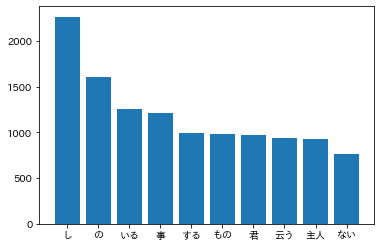

In [26]:
import matplotlib.pyplot as plt

plt.bar(terms, freqs)
# plt.rcParams['font.family'] = 'Humor-Sans'
plt.rcParams['font.family'] = 'IPAexGothic'
#plt.rcParams['font.family'] = 'IPAGothic'
# plt.rcParams['font.family'] = 'Gothic'
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [27]:
# 前後に存在しやすい単語のこと？
# 文の中に猫があるかで調べないといけないらしい
# できなかった。。。
from collections import Counter
term_freqs = Counter()  # 各単語の頻度のCounterクラス(辞書のサブクラス)の辞書 term_freqs { '単語': 出現頻度' }
for i in range(1,len(node_list)-1):
    if node_list[i]['surface'] == '猫':
        term_freqs[node_list[i-1]['surface']] += 1   # 猫の前の単語
        term_freqs[node_list[i+1]['surface']] += 1   # 猫の後の単語

print(term_freqs)   # ほぼ辞書と同じ
print(term_freqs.most_common()[:10]) # 出現頻度の高い順で並べる

Counter({'の': 75, 'は': 36, 'で': 28, 'に': 28, 'が': 27, 'と': 27, '、': 25, '。': 22, 'だ': 11, 'を': 10, 'も': 9, 'より': 8, 'この': 8, '等': 7, 'じゃ': 7, 'だって': 7, 'など': 7, 'な': 7, 'として': 5, 'いる': 5, 'から': 5, 'ながら': 4, '属': 4, 'なら': 3, '——': 3, '吾輩': 3, 'その': 3, '雄': 3, '誉': 3, 'しかし': 3, 'ば': 3, 'たら': 3, 'た': 2, '族': 2, '黒': 2, '中': 2, '\u3000': 2, 'だけ': 2, 'いくら': 2, 'へ': 2, 'くらい': 2, '何だか': 2, '南無': 2, '児': 2, 'たる': 2, 'にとって': 2, 'です': 2, '庸': 2, 'どうしても': 2, 'その後': 1, '小': 1, '永く': 1, '盲': 1, '大きな': 1, '乱暴': 1, 'やすい': 1, 'って': 1, 'せめて': 1, '々': 1, 'どの': 1, 'やはり': 1, 'や': 1, 'か': 1, 'かえって': 1, 'あら': 1, 'ねえ': 1, '憎らしい': 1, 'だっ': 1, 'らしく': 1, '薄ぎたない': 1, '」': 1, 'それから': 1, '可愛らしい': 1, 'なに': 1, '無性': 1, 'こう': 1, '一般': 1, 'ぬ': 1, 'する': 1, '愚': 1, '決して': 1, 'まします': 1, '大明神': 1, 'それだけ': 1, 'に対する': 1, '到底': 1, '雌': 1, 'または': 1, '図々しい': 1, '食い': 1, '「': 1, '仮令': 1, '鍋': 1, 'しかしながら': 1, '混成': 1, '旅団': 1, '賢しゅう': 1, 'よほど': 1, 'すこぶる': 1, 'でも': 1, '一疋': 1, '輩': 1, 'ただ': 1, 'なんぞ': 1, '的': 1, '美': 1, '霊': 1, 'ご

## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

In [52]:
#　よくわからなかった
from collections import Counter
term_freqs = Counter()  # 各単語の頻度のCounterクラス(辞書のサブクラス)の辞書 term_freqs { '単語': 出現頻度' }
for node in node_list:
    if node['pos'] not in ['助詞', '助動詞', '記号', '連体詞'] and len(node['surface']) > 0:
        term_freqs[node['surface']] += 1
print(term_freqs)   # ほぼ辞書と同じ

Counter({'し': 2265, 'の': 1611, 'いる': 1251, '事': 1207, 'する': 998, 'もの': 981, '君': 973, '云う': 937, '主人': 932, 'ない': 765, 'ん': 704, 'ある': 703, 'よう': 697, '御': 636, '人': 602, '一': 554, 'そう': 554, '何': 539, '吾輩': 481, 'い': 477, 'なる': 415, 'これ': 414, 'なっ': 404, 'それ': 395, '来': 364, '見': 350, '時': 344, '迷亭': 343, 'れ': 330, 'いい': 320, '——': 319, 'ところ': 315, '方': 312, '三': 311, '二': 302, '上': 294, '寒月': 286, '顔': 282, '先生': 274, '見る': 273, '人間': 272, '僕': 268, 'さん': 260, '気': 250, '猫': 248, '出': 245, '出来': 244, '云っ': 241, 'また': 238, '中': 233, '思っ': 232, '十': 230, 'どう': 220, '細君': 213, 'さ': 211, 'なら': 207, '今': 199, '鼻': 199, '大': 195, '者': 194, 'しかし': 185, 'あり': 185, 'てる': 182, '自分': 175, '少し': 172, '頭': 169, 'ちょっと': 169, '訳': 159, '前': 158, '声': 154, '日': 152, 'うち': 152, 'ただ': 150, '知れ': 150, '聞い': 150, '私': 149, 'あっ': 147, '男': 147, '思う': 146, '行っ': 144, 'せ': 143, '家': 143, '子': 143, '眼': 142, 'ため': 141, '見え': 139, 'よく': 138, '出し': 137, '彼': 134, '誰': 133, '間': 131, '所': 127, '知ら': 127, 'なく':

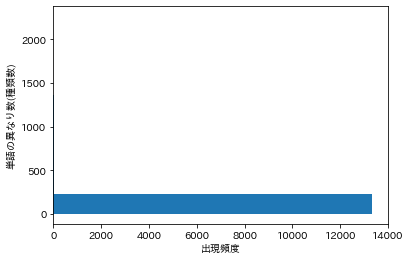

In [41]:
#　単語の異なり数とは
plt.hist(term_freqs.values(), orientation='horizontal')
plt.xlabel('出現頻度')
plt.ylabel('単語の異なり数(種類数)')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

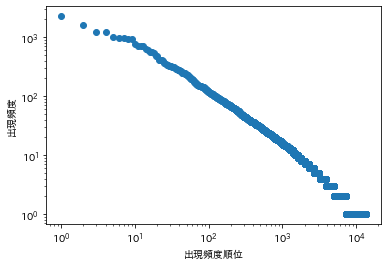

In [51]:
print(list(range(1,len(list(term_freqs.values()))+1)))
plt.scatter(list(range(1,len(list(term_freqs.values()))+1)), [num for _, num in term_freqs.most_common()])
plt.xscale('log')   # 
plt.yscale('log')   # これをやらない両対数にならない
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.rcParams['font.family'] = 'IPAexGothic'
plt.show()